# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url + city).json()
        city_weather = response
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | sungai penuh
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | sinop
Processing Record 5 of Set 1 | chonchi
Processing Record 6 of Set 1 | tugulym
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | port nelson
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | bethel
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,5.57,89,32,0.89,NZ,1728579195
1,sungai penuh,-2.0833,101.3833,19.14,93,56,1.51,ID,1728579196
2,waitangi,-43.9535,-176.5597,6.01,86,73,5.41,NZ,1728578599
3,sinop,41.7711,34.8709,14.60,90,24,1.02,TR,1728579199
4,chonchi,-42.6128,-73.8092,11.73,98,100,1.13,CL,1728579200


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,5.57,89,32,0.89,NZ,1728579195
1,sungai penuh,-2.0833,101.3833,19.14,93,56,1.51,ID,1728579196
2,waitangi,-43.9535,-176.5597,6.01,86,73,5.41,NZ,1728578599
3,sinop,41.7711,34.8709,14.60,90,24,1.02,TR,1728579199
4,chonchi,-42.6128,-73.8092,11.73,98,100,1.13,CL,1728579200


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

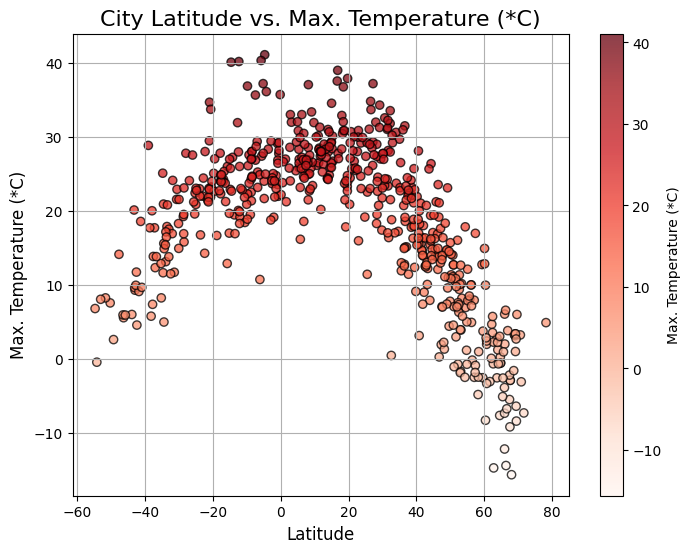

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Max Temp'], 
    c=city_data_df['Max Temp'],
    cmap='Reds',
    edgecolor='black', 
    linewidths=1, 
    marker='o', 
    alpha=0.75
)
# Incorporate the other graph properties
plt.colorbar(scatter, label='Max. Temperature (*C)')

plt.title("City Latitude vs. Max. Temperature (*C)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max. Temperature (*C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

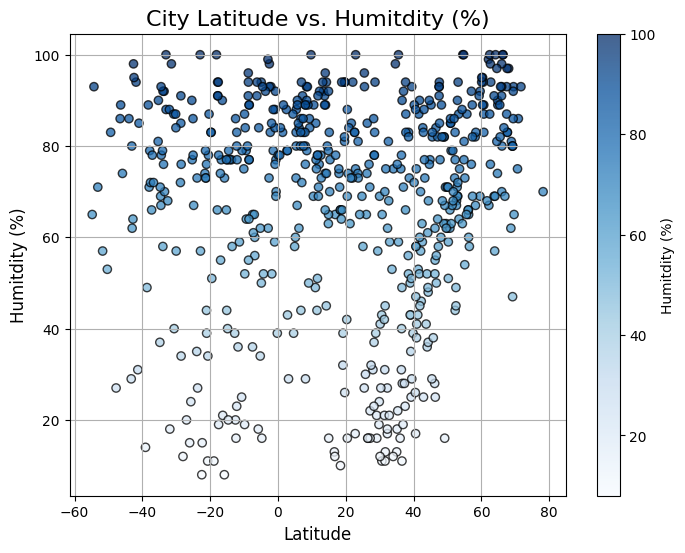

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Humidity'], 
    c=city_data_df['Humidity'],
    cmap='Blues',
    edgecolor='black', 
    linewidths=1, 
    marker='o', 
    alpha=0.75
)
# Incorporate the other graph properties
plt.colorbar(scatter, label='Humitdity (%)')

plt.title("City Latitude vs. Humitdity (%)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humitdity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

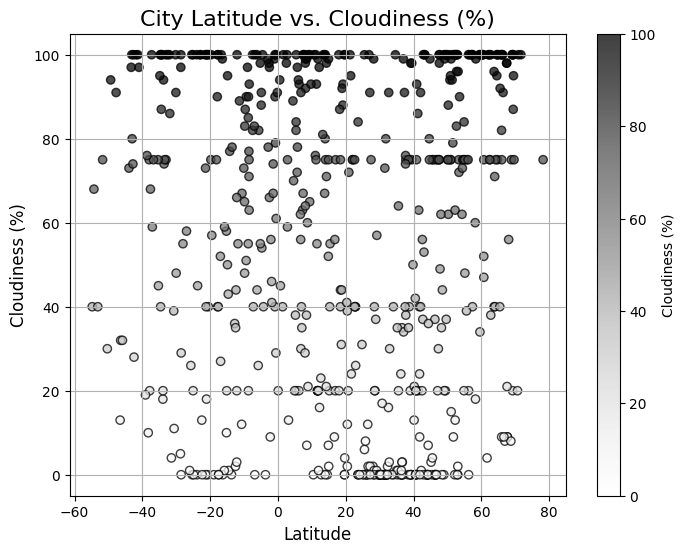

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Cloudiness'], 
    c=city_data_df['Cloudiness'],
    cmap='Greys',
    edgecolor='black', 
    linewidths=1, 
    marker='o', 
    alpha=0.75
)
# Incorporate the other graph properties
plt.colorbar(scatter, label='Cloudiness (%)')

plt.title("City Latitude vs. Cloudiness (%)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

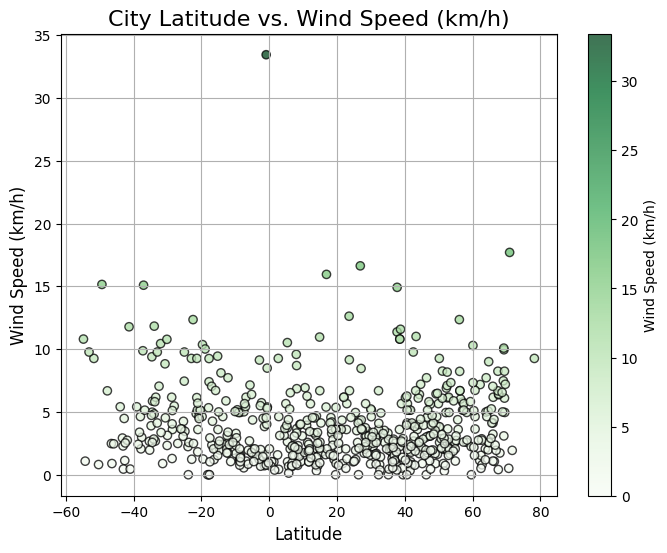

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Wind Speed'], 
    c=city_data_df['Wind Speed'],
    cmap='Greens',
    edgecolor='black', 
    linewidths=1, 
    marker='o', 
    alpha=0.75
)
# Incorporate the other graph properties
plt.colorbar(scatter, label='Wind Speed (km/h)')

plt.title("City Latitude vs. Wind Speed (km/h)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (km/h)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_lin_reg(x, y, x_label, y_label, title):
    s_color="blue"
    l_color="red"
    if(y_label == "Max. Temperature"):
        s_color = "red"
        l_color = "green"
    elif(y_label == "Cloudiness"):
        s_color = "grey"
    elif(y_label == "Wind Speed"):
        s_color = "green"
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_values = slope * x + intercept

    # make plot and line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color=s_color, edgecolor='black', linewidths=1, marker='o', alpha=0.75)
    plt.plot(x, regress_values, color=l_color, label=f"Linear Reg (slope={slope:.2f})")
    
    # Incorporate the other graph properties
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True)
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,sinop,41.7711,34.8709,14.60,90,24,1.02,TR,1728579199
5,tugulym,57.0591,64.6425,-2.47,92,100,5.78,RU,1728579201
6,talnakh,69.4865,88.3972,-8.38,93,95,4.96,RU,1728578606
7,port nelson,23.6333,-74.8333,29.16,81,84,9.15,BS,1728579203
8,isafjordur,66.0755,-23.1240,2.02,80,100,6.17,IS,1728579204


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,5.57,89,32,0.89,NZ,1728579195
1,sungai penuh,-2.0833,101.3833,19.14,93,56,1.51,ID,1728579196
2,waitangi,-43.9535,-176.5597,6.01,86,73,5.41,NZ,1728578599
4,chonchi,-42.6128,-73.8092,11.73,98,100,1.13,CL,1728579200
11,papatowai,-46.5619,169.4708,5.95,86,13,2.48,NZ,1728579207


###  Temperature vs. Latitude Linear Regression Plot

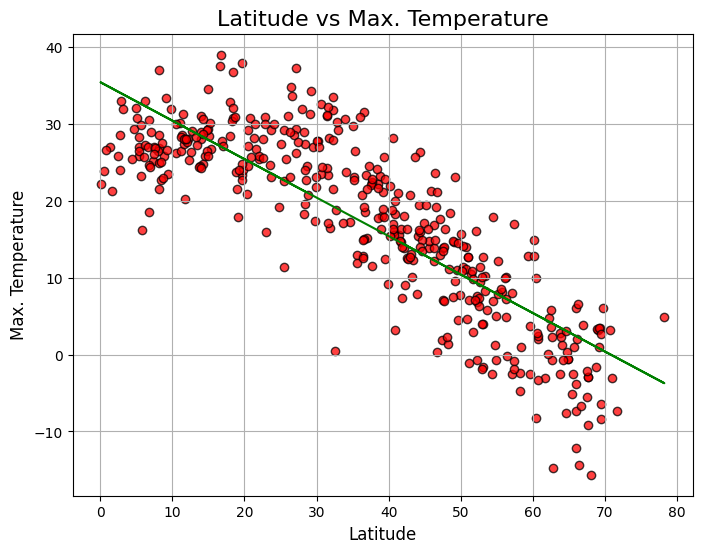

In [15]:
# Linear regression on Northern Hemisphere
plot_lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max. Temperature", "Latitude vs Max. Temperature")

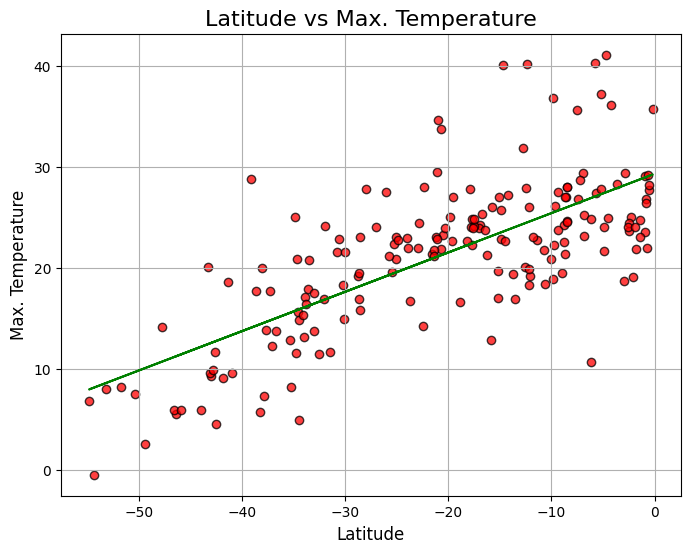

In [16]:
# Linear regression on Southern Hemisphere
plot_lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max. Temperature", "Latitude vs Max. Temperature")

**Discussion about the linear relationship:**

Temperature increases towards the equator (latitudes approaching 0), and decreases towards the poles (latitudes approaching +/-90). This makes sense as the equator is known for it's heat and long summers. Similarily, the poles are known for their cold and long winters.

### Humidity vs. Latitude Linear Regression Plot

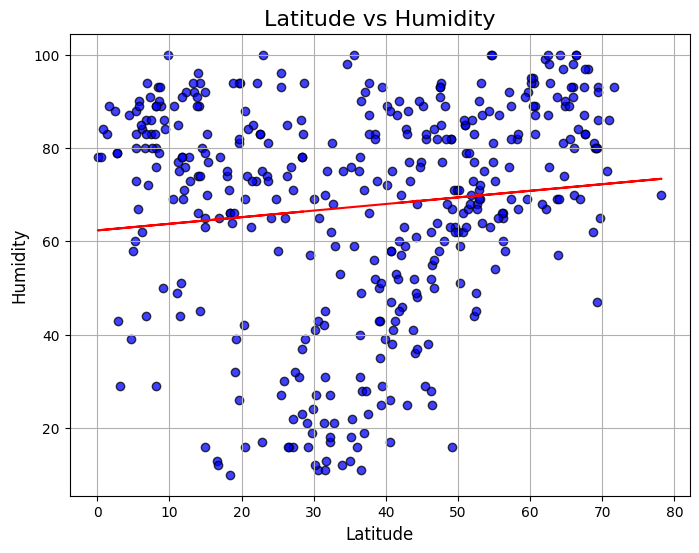

In [17]:
# Northern Hemisphere
plot_lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")

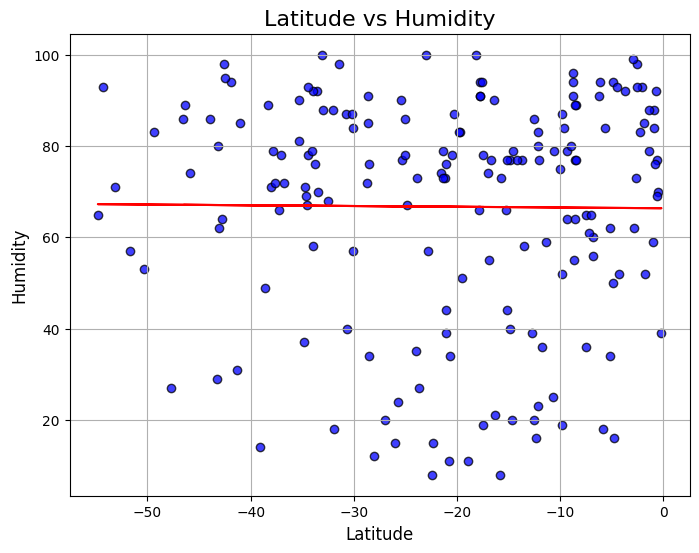

In [18]:
# Southern Hemisphere
plot_lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")

**Discussion about the linear relationship:**

The correlation is much weaker with humidity than with temperature. However, there is a slight trend to average humidity increasing away from the equator. This could make sense as the data does not reach the poles (+/-90 latitude) where humidity would be expected to drop off and cause the trend to flip. The humidity at different latitudes will also depend on climate zones influenced by several factors that could allow for this conclusion.

### Cloudiness vs. Latitude Linear Regression Plot

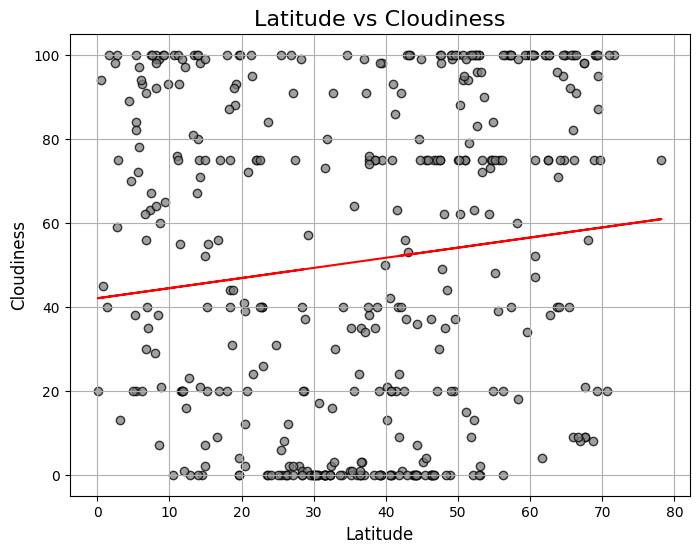

In [19]:
# Northern Hemisphere
plot_lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")

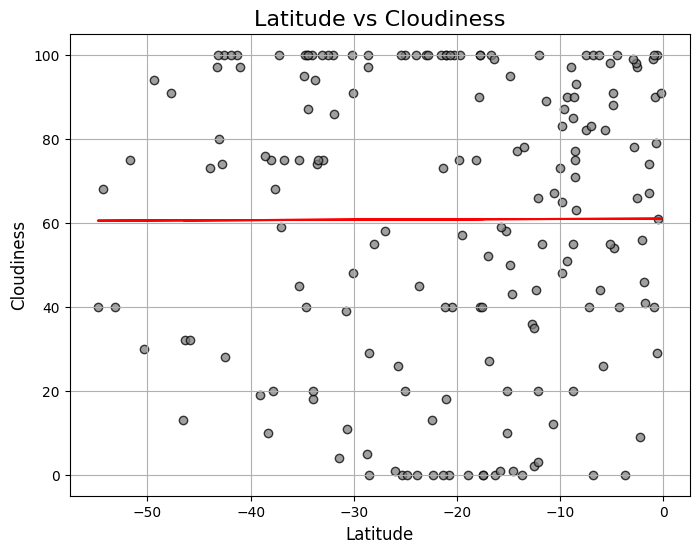

In [20]:
# Southern Hemisphere
plot_lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")

**Discussion about the linear relationship:**

Cloudiness seems to increase away from the equator in the northern hemisphere, and slightly decrease away from the equator in the southern hemisphere. It is interesting how different the linear relationships are. Perhaps this would change if there were more southern datapoints (i.e. in the -50 to -80 range). This could be influenced by several factors like winds, mountains, and bodies of water.

### Wind Speed vs. Latitude Linear Regression Plot

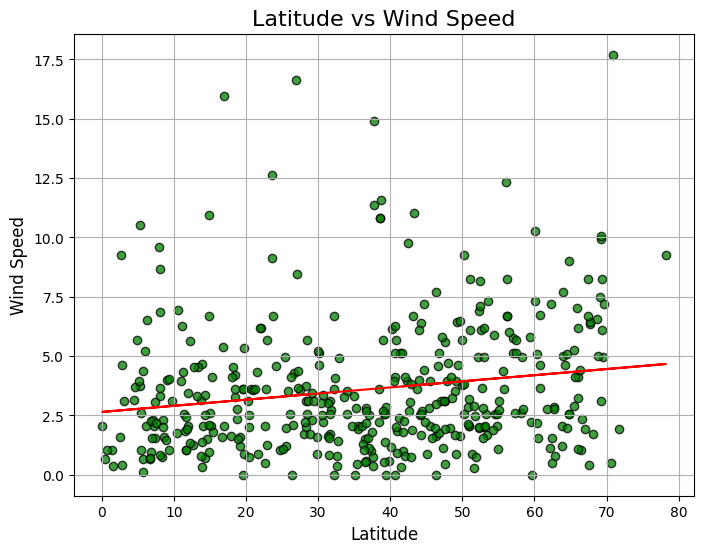

In [21]:
# Northern Hemisphere
plot_lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

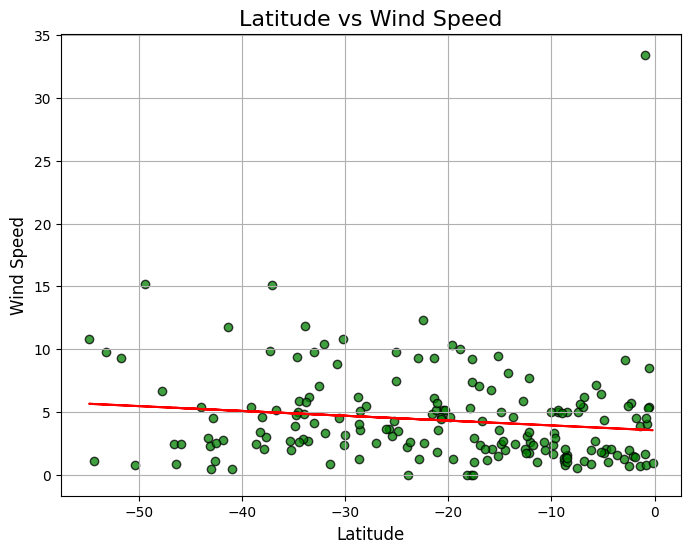

In [22]:
# Southern Hemisphere
plot_lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

**Discussion about the linear relationship:**

Wind speed seems to increase away from the equator in both the northern and southern hemispheres. This makes sense as trade winds converge at the equator and even out making for less windy conditions. Thus, wind patterns are often strongest on either end of the equator.